# Housing Price Prediction

# Section 0: Introduction

In this notebook, we will use use regression, a supervised learning technique used to predict continuous outcomes - Housing Prices.

In summary, I intend to cover the following:
1. Prepare the data
        - Gather necessary data to answer our questions
        - Handle categorical and missing data
        - Provide insight into the methods you chose and why you chose them

2. Analyze, Model, and Visualize
        Provide a clear connection between your business questions and how the data answers them.

## Data Description

The dataset used is a competition dataset used for data science education, and is hosted on Kaggle.

You can obtain the dataset via this [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The blogpost related to this notebook is found [here](https://medium.com/@asilavictor/predicting-house-prices-using-linear-regression-381be1bfd200)

***Brief Descrition of the Datasets used**

I have downloaded the data and saved it on my local drive. The dataset is a zipped file and will have to be unzipped for on to acces the 
datasets for interest. The zipped file contains three .csv files - train.csv, test.csv, sample_submission.csv and data_description.txt .
Train.csv contains the training sample, while test.csv contains the test samples. Detailed descriptions for the datasets are contained 
in the data_descriptions.txt
For this notebook, I wil not be overly interested in the sample_sbumission.csv

# Section 1: Business Understanding


The specif business questions that I attempt to answer are as follows:

1. Find out if any of features affect housing pries using exloratory data analysis
2. Develop a model to predict the final price of each home
3. Evaluate our model to ascetain that it is suitable for predicting housing prices

# Section 2: Data Understaning

In this section:

1. I import the relevant Python libraries
2. I write a function that imports the zipped data, unzippes it and reads the train.csv data
3. I take a peek at the data by displaying a few rows, get the structure of the data using the info() method
4. Make a general summary of the data using describe() method from pandas

In [1]:
# Let's import the necessary libraries for data preprocessing

import pandas as pd
import zipfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
# let's write a function to read the data

def read_zip_data(path, file_name):
    """
    This function unzips the zipped data,
    then imports the 'train.csv' data and 
    returnsit as a pandas dataframe

    Args:
        path (_sting_): directory path where 
        the data is stored
        
        file_name (_zipped file_): Name of 
        the zipped file

    Returns:
        _dataframe_: Returns the data as a 
        pandas dataframe
    """
    zf = zipfile.ZipFile(path + "/" + file_name)
    train_data = pd.read_csv(zf.open("train.csv"))
        
    return train_data


In [3]:
path = "D:/03. Data & Scripts/02. Python/Udacity/Udacity-Data-Scientist-Nanodegree-project-/Project1/Data"

file_name = "house-prices.zip"

train_data = read_zip_data(path=path, file_name=file_name)

In [4]:
# let's have a look at the data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's get more information about our data.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Our data contains a mixture of numeric and categorical features. Features with a Dtype "int64" or "float64" are of a numerical nature, while features
of Dtype "object" are of categorical nature.

In [6]:
# let's create some summaries

train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Section 3: Exploring the Dataset to Find out any features Affecting House Prices *

In this section, I'll start by selecting numerical columns and then categorical columns. I'll then explore each of the two separtely, then try to determine using descriptives, the features in the two groups of data types 
affect house prices.

In [7]:
# select numerical variables

numerical_variables = train_data.select_dtypes(include=['int64','float64'])

categorical_variables = train_data.select_dtypes(include=['object'])

In [8]:
# lets check out the numerical features

numerical_variables.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
numerical_variables.shape

(1460, 38)

In [10]:
# let see which features are categorical

categorical_variables.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
categorical_variables.shape

(1460, 43)

# Section 3.1: Univaiate Analysis

In this section, I'll visually explore each numerical feature on it own

1. To determine the distribution
2. Plot the distribution plots of the numeric variables
3. Plot the correlation plots of the numeric variables

Let's first import the plotting libraries

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

I make distribution plots of the numerical variables

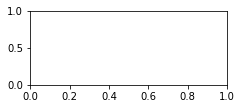

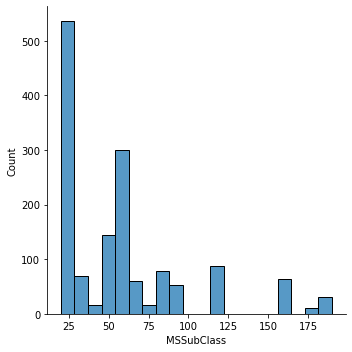

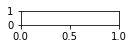

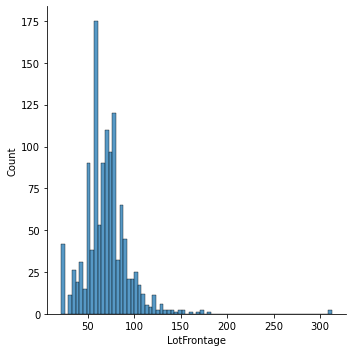

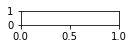

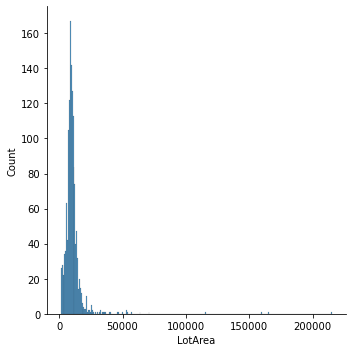

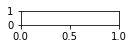

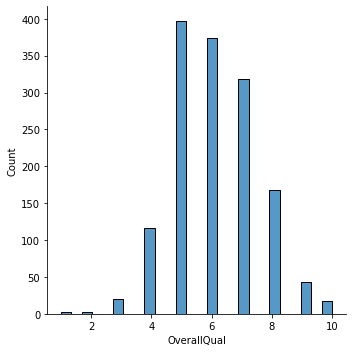

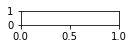

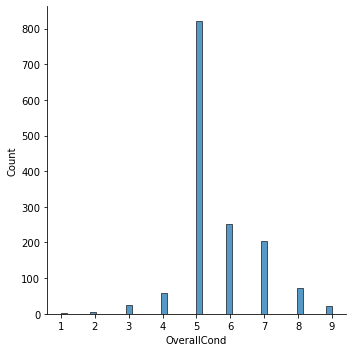

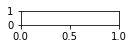

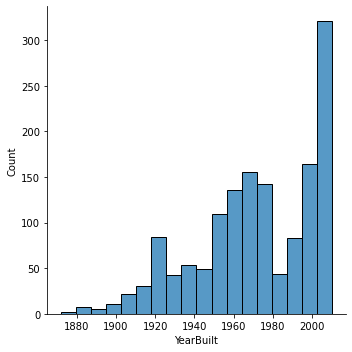

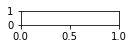

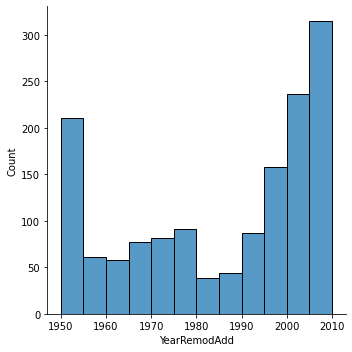

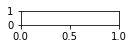

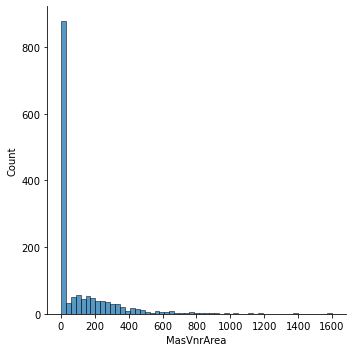

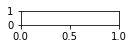

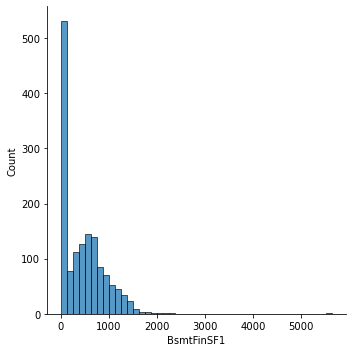

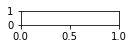

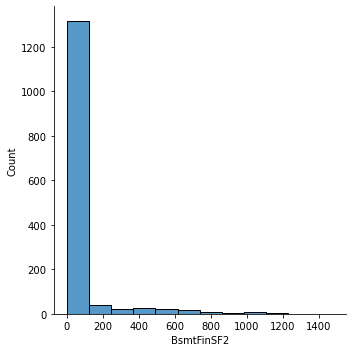

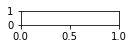

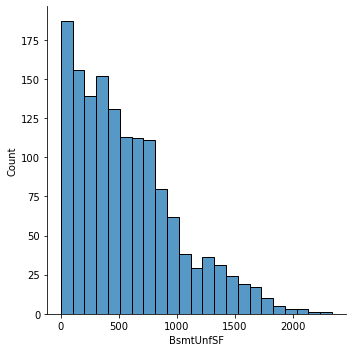

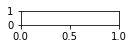

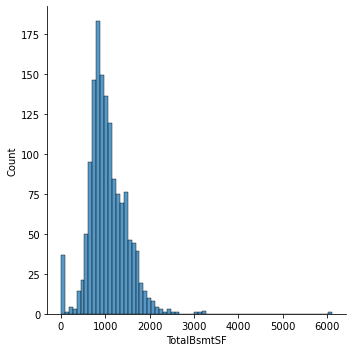

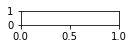

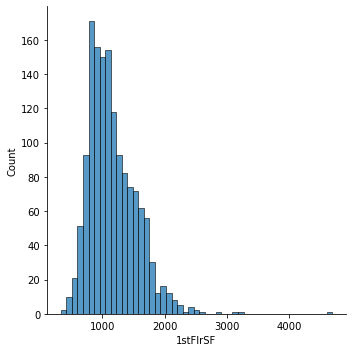

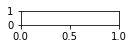

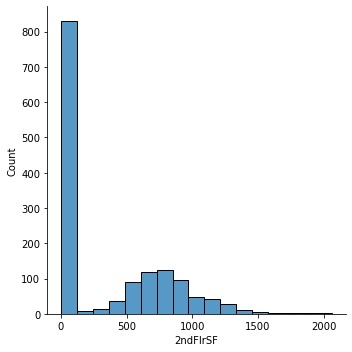

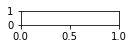

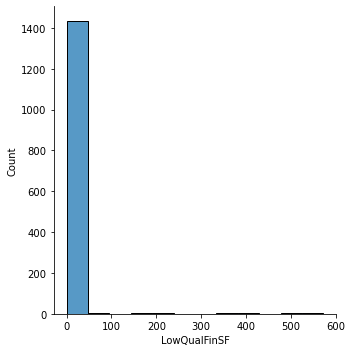

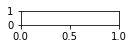

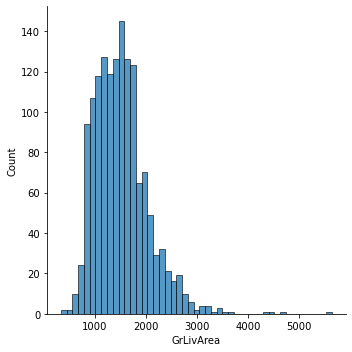

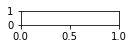

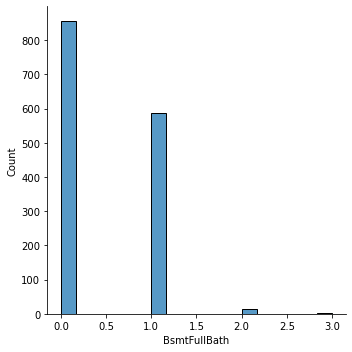

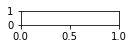

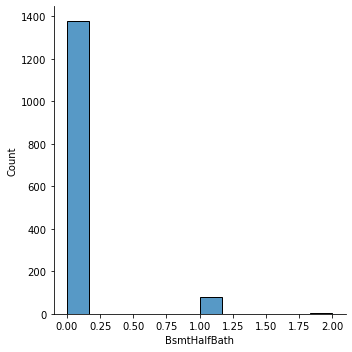

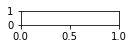

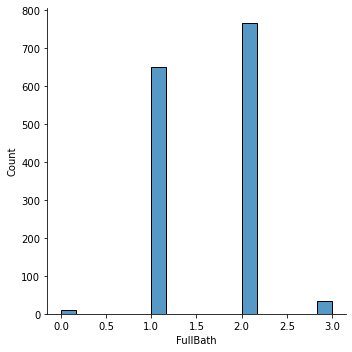

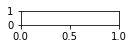

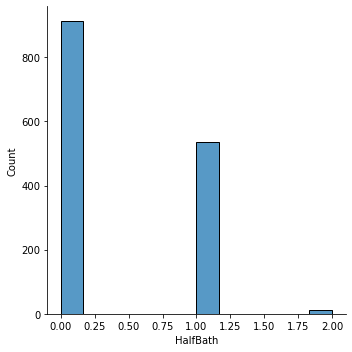

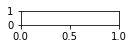

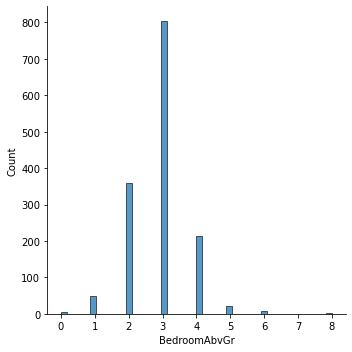

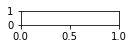

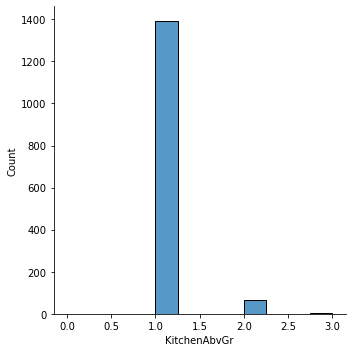

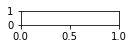

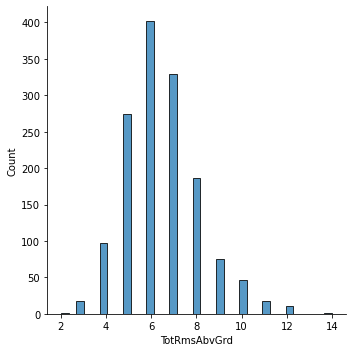

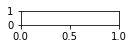

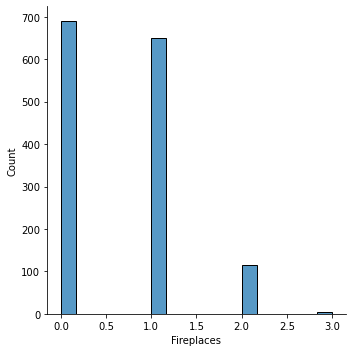

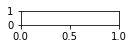

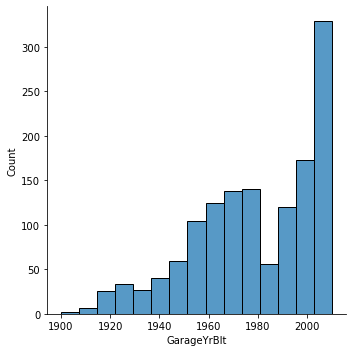

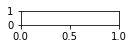

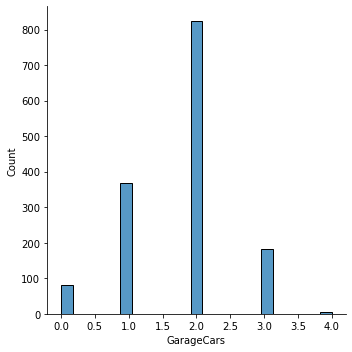

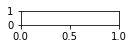

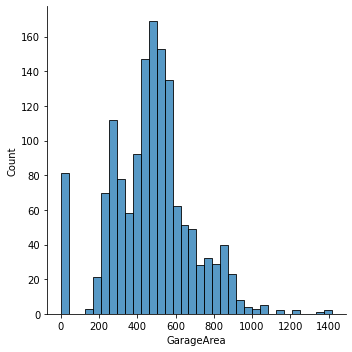

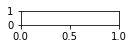

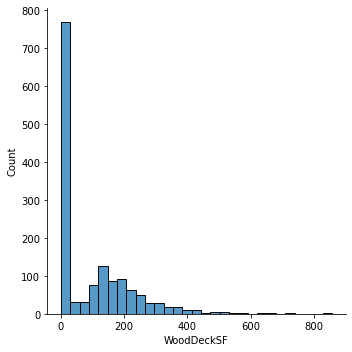

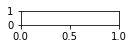

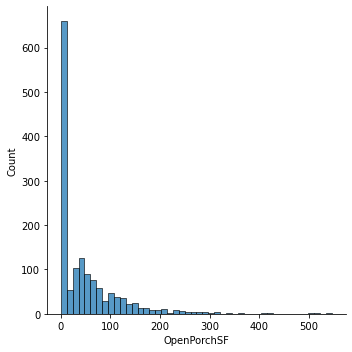

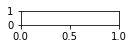

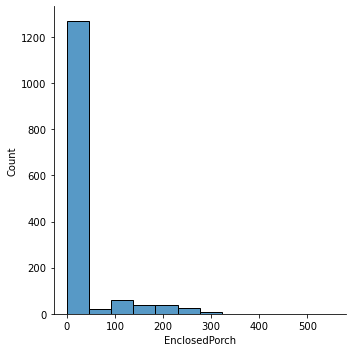

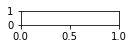

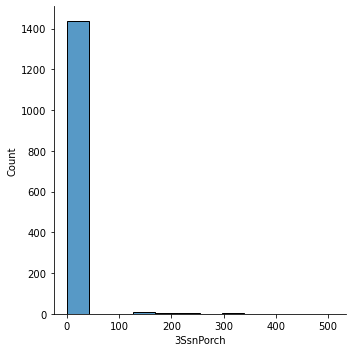

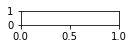

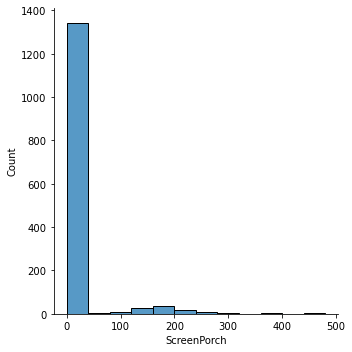

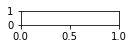

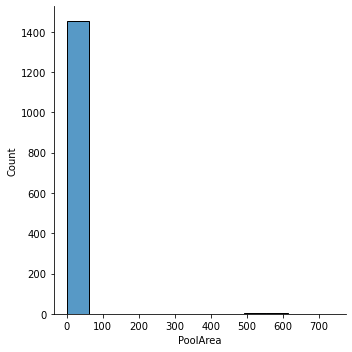

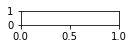

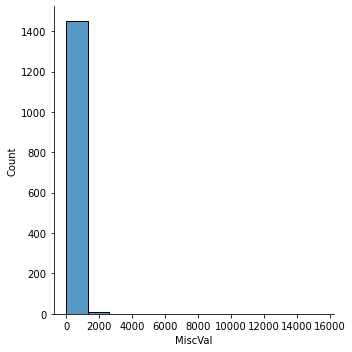

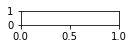

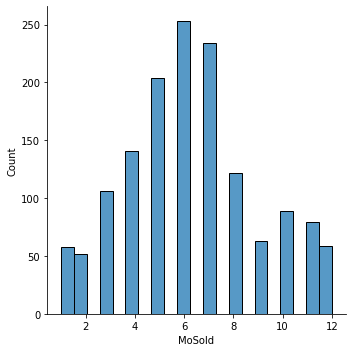

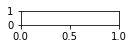

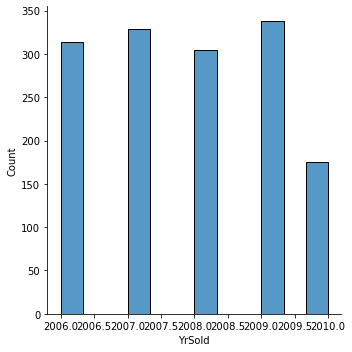

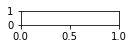

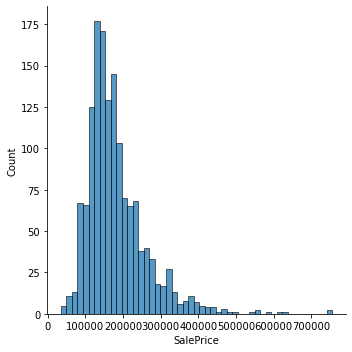

In [13]:
plot_size = plt.subplots(figsize=(12, 21))

# loop throught the feaures and plot. We'll exlude the columns "Id" and "SalePrice"
i = 0
for feature in numerical_variables.columns:
    if feature not in ['Id','SalesPrice']:
        i += 1
        plt.subplot(13, 3, i)
        sns.displot(train_data[feature])
        plt.tight_layout()
        plt.show()
        

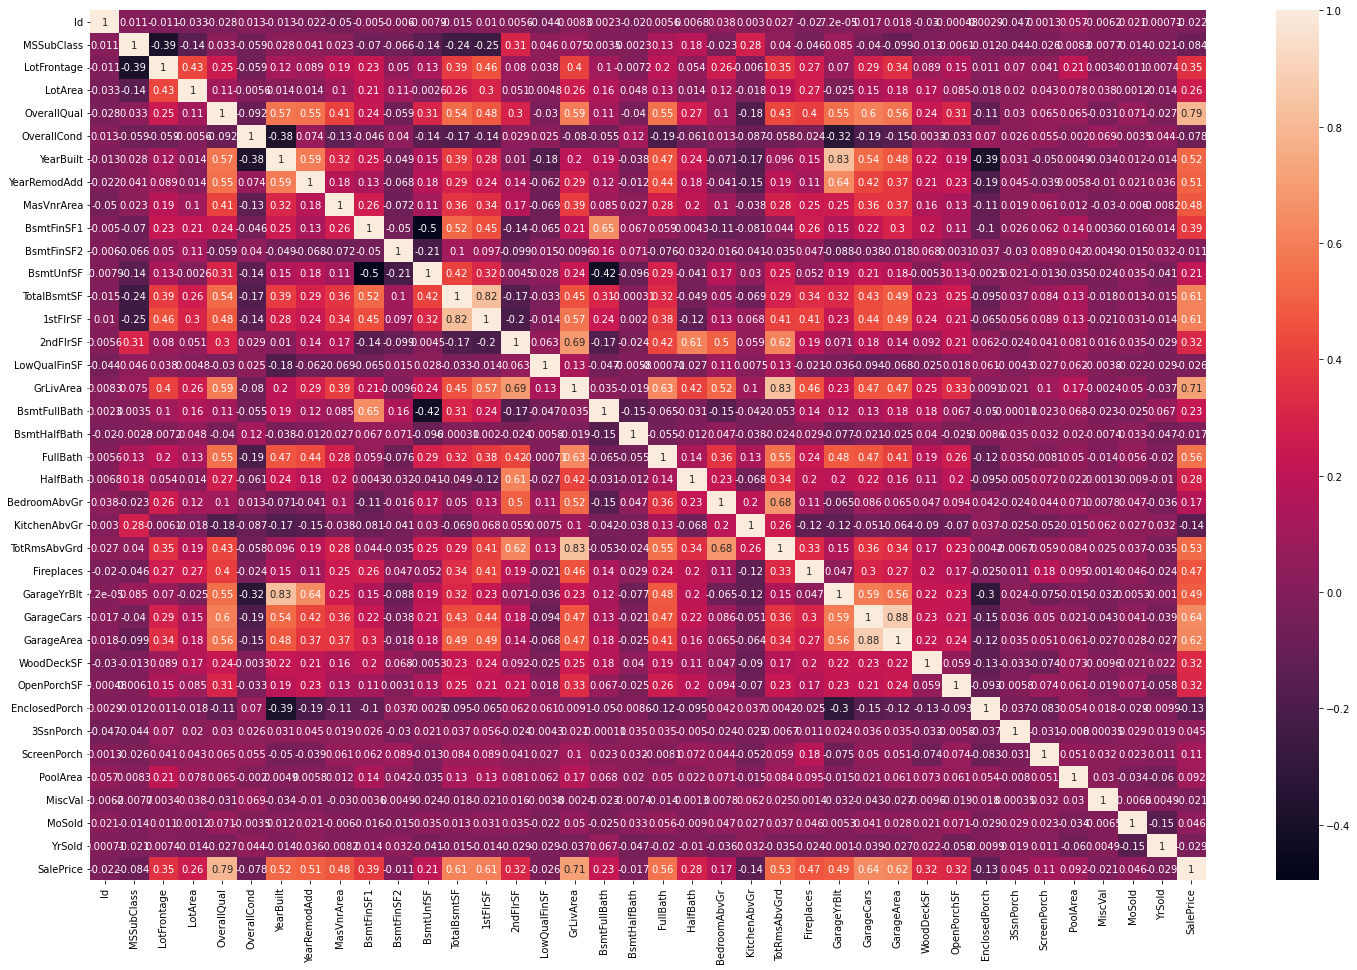

In [14]:
# let have a heat map of the correlation plots

plt.figure(figsize=(25,16))
sns.heatmap(numerical_variables.corr(), annot=True)
plt.show()

# Section 3.2: Feature Realtionship Exploration**

From the 38 numerical features, we will examine them and get an idea of what the important features are. I will first use Pearson's correlation coefficient ($\rho$) to filter the predictor variable.

In [15]:
# correlation coefficient of each variable

correlations = numerical_variables.corr()

# correlation coefficent between predictor variables and 'SalePrice'
corr_with_target = correlations['SalePrice']

# show the correlation coefficent between predictor variables and 'SalePrice'
corr_with_target.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr


The correlation coefficent between features and 'SalePrice' has a range from -0.136 to 0.790. We can filter the important variable by selecting the features with coefficient correlation greater than 0.5 (r>0.5)


I then select all the variables with a correlation co-efficient greater than 0.5

In [16]:
corr_with_target = corr_with_target[corr_with_target.abs() > 0.5]

corr_with_target.sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

I obtain ten features with an absolute correlation value of > 0.5

In a business case, we can conclude that based on this preliminary evidence, taht the 10 variables have a strong relationship or affect the house sales price.
These features can therefore be seen to be strong predictors of house prices.

I then get the names of the said 10 features

In [17]:
# get those 10 feature names

col_names = corr_with_target.keys()

print(col_names)



Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


I then preview the selected 10 features

In [18]:
numerical_variables[col_names].head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


I save the 10 features in a new object(dataframe)

In [19]:
reduced_num_data = numerical_variables[col_names]

I then get a brief description of the new dataframe

In [20]:
reduced_num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   TotalBsmtSF   1460 non-null   int64
 4   1stFlrSF      1460 non-null   int64
 5   GrLivArea     1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   GarageArea    1460 non-null   int64
 10  SalePrice     1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


Next, I check the multicollinearity between the 10features. I use the correlation cofficient heatmap for this purpose.

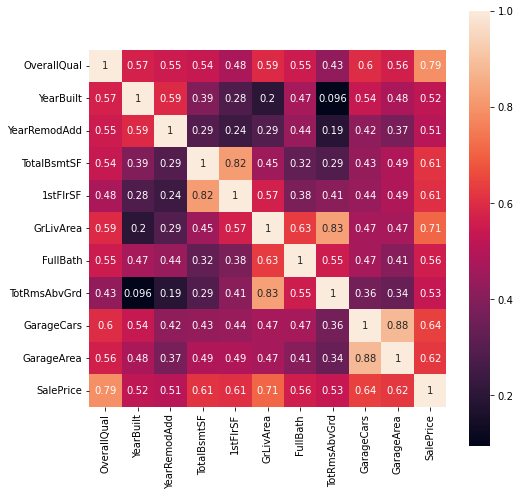

In [21]:
# get the correlation coefficient
corr_map = numerical_variables[col_names].corr()

# let's plot the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_map, square=True, annot=True)
plt.show()

From the heatmap, multicollinearity exist between:
* '1stFlrSF' and 'TotalBsmntSF' (r=0.82)
* 'GrLivArea' and 'TotRmsAbvGrd' (r=0.83)
* 'GarageCars' and 'GarageArea' (r=0.88)

Between those variables, I select 'GrLivArea' and 'GarageCars' because they have a higher correlation coefficient with 'SalePrice'. 
The '1stFlrSF' and 'TotalBsmntSF' have same correlation coefficient with 'SalePrice'. However, I think the first floor area is more important when one buys a house. 
Therefore, I choose '1stFlrSF'.

Finally, the numerical features consit of 7 variables: 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'FullBath', '1stFlrSF', 'GrLivArea',and 'GarageCars'.

I then save the seven features in a new dataframe

In [22]:
reduced_num_data = train_data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'FullBath', '1stFlrSF', 'GrLivArea', 'GarageCars']]

In [23]:
reduced_num_data.head()

,OverallQual,YearBuilt,YearRemodAdd,FullBath,1stFlrSF,GrLivArea,GarageCars
0,7,2003,2003,2,856,1710,2
1,6,1976,1976,2,1262,1262,2
2,7,2001,2002,2,920,1786,2
3,7,1915,1970,1,961,1717,3
4,8,2000,2000,2,1145,2198,3


# Section 4: Exploration of the Categoriacal Features

Let's have a look at the categorical variables

In [24]:
# a view of the categorical variables

categorical_variables.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


From section 2 above, we gather that the categorical features are of type 'object'. We then have to change the tpype to 'category' to make it easier to convert them to ordinal or norminal features

In [25]:
for feature in categorical_variables.columns:
    if feature not in ["Id","SalePrice"]:
       categorical_variables[feature] = categorical_variables[feature].astype('category')

In [26]:
# have a veiw of the new structure
categorical_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   Street         1460 non-null   category
 2   Alley          91 non-null     category
 3   LotShape       1460 non-null   category
 4   LandContour    1460 non-null   category
 5   Utilities      1460 non-null   category
 6   LotConfig      1460 non-null   category
 7   LandSlope      1460 non-null   category
 8   Neighborhood   1460 non-null   category
 9   Condition1     1460 non-null   category
 10  Condition2     1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  RoofStyle      1460 non-null   category
 14  RoofMatl       1460 non-null   category
 15  Exterior1st    1460 non-null   category
 16  Exterior2nd    1460 non-null   category
 17  MasVnrType     1452 non-null   ca

In [27]:
# get categorical feature names

categorical_names = categorical_variables.keys()
print(categorical_names)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


Since there are quite a number of categorical features, for purposes of display, I visualize select feautes

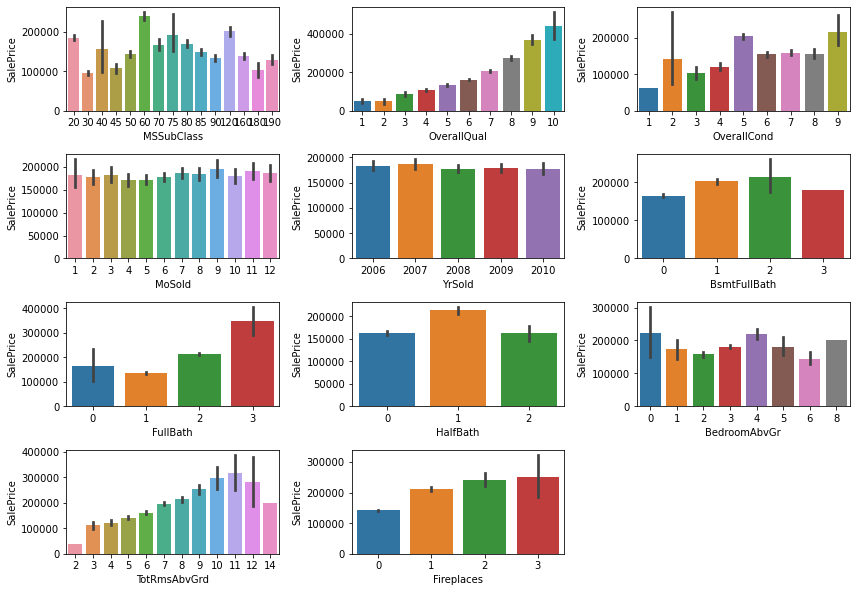

In [28]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass','OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces']):
    plt.subplot(6, 3, i+1)
    sns.barplot(train_data[feature], train_data['SalePrice'])
    plt.tight_layout()

From the above plots, OverallQual , FullBath, TotRmsAbvGrd and Fireplaces seem to positively affect the house price. From this preniminary evidence, we can conlude that the features affect house prices. House with a good overal quality,more room that are above grade, with a full bathrooms above grade and more than one fire place seem to attract higher prices.

There two types of categorical features are present:

1. Encoding For Categorical Variables Ordered Features: to be label encoded: 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

2. Unordered Features: to be one hot encoded: 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [29]:
# Let's encode the Ordinal Categorical Features

train_data['ExterQual'] = train_data['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train_data['ExterCond'] = train_data['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_data['BsmtQual'] = train_data['BsmtQual'].map({'NA_BsmtQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['BsmtCond'] = train_data['BsmtCond'].map({'NA_BsmtCond':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['BsmtExposure'] = train_data['BsmtExposure'].map({'NA_BsmtExposure':0,'No':1,'Mn':2,'Av':3,'Gd':4})
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].map({'NA_BsmtFinType1':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].map({'NA_BsmtFinType2':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train_data['HeatingQC'] = train_data['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_data['KitchenQual'] = train_data['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_data['GarageFinish'] = train_data['GarageFinish'].map({'NA_GarageFinish':0,'Unf':1,'RFn':2,'Fin':3})
train_data['GarageQual'] = train_data['GarageQual'].map({'NA_GarageQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['GarageCond'] = train_data['GarageCond'].map({'NA_GarageCond':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['FireplaceQu'] = train_data['FireplaceQu'].map({'NA_FireplaceQu':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

Key:
1. For 'Alley', Nan means 'No access to alley'
2. For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
3. For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
4. For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
5. MiscFeature - Nan means no additional features mentioned.

All these features can be imputed by making them into one category in place of missing data.

In [30]:
# let's have a look at the encorded columns
train_data[['ExterQual','ExterCond','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','GarageFinish','GarageCond','FireplaceQu']].head()

,ExterQual,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageCond,FireplaceQu
0,3,2,3.0,1.0,6.0,1.0,4,3,2.0,3.0,NaN
1,2,2,3.0,4.0,5.0,1.0,4,2,2.0,3.0,3.0
2,3,2,3.0,2.0,6.0,1.0,4,3,2.0,3.0,3.0
3,2,2,4.0,1.0,5.0,1.0,3,3,1.0,3.0,4.0
4,3,2,3.0,3.0,6.0,1.0,4,3,2.0,3.0,3.0


# Section 4.1: One Hot encoding on Nominal Features

In [31]:
# One Hot Encoding on Nominal features
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
                      'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                      'Electrical', 'GarageType','PavedDrive', 'Fence', 'MiscFeature', 'SaleType','SaleCondition','LotShape',
                      'Utilities', 'LandSlope', 'HouseStyle', 'CentralAir', 'Functional']

dummy_variables = pd.get_dummies(train_data[unordered_features], drop_first=True)

dummy_variables.shape

(1460, 160)

In [32]:
dummy_variables.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


I then drop those classes which are present less than/equal to 1% of the observations since linear regression is sensitve to missing data

In [33]:
# Dropping those classes which are present less than/equal to 1% of the observations.
dummy_cols_drop = []
for feat in dummy_variables.columns:
    if dummy_variables[feat].value_counts()[0]/dummy_variables.shape[0] >= 0.98:
        dummy_cols_drop.append(feat)
    elif dummy_variables[feat].value_counts()[1]/dummy_variables.shape[1] >= 0.98:
        dummy_cols_drop.append(feat)
        
print(dummy_cols_drop)
print(len(dummy_cols_drop))

['MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LandContour_Lvl', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Stone', 'Exterior1st_Stu

In [34]:
dummy_variables.drop(columns = dummy_cols_drop, axis = 1, inplace = True)
dummy_variables.shape

(1460, 45)

I then add the encorded variables back to the original frame

In [35]:
# Adding the dummy variables to the original dataframe
df = pd.concat([train_data,dummy_variables],axis=1)

# # Dropping the redundant columns
df = df.drop(unordered_features,axis=1)

df.shape

(1460, 97)

I then check the percentage of missingness in dataframe containing the encorded categorical features

In [36]:
for f in df.columns:
    if df[f].isnull().any():
        print(f, ':', "% missing =", round(df[f].isnull().sum()/df.shape[0], 3) * 100, 
              ", data type is",df[f].dtypes)

LotFrontage : % missing = 17.7 , data type is float64
MasVnrArea : % missing = 0.5 , data type is float64
BsmtQual : % missing = 2.5 , data type is float64
BsmtCond : % missing = 2.5 , data type is float64
BsmtExposure : % missing = 2.6 , data type is float64
BsmtFinType1 : % missing = 2.5 , data type is float64
BsmtFinType2 : % missing = 2.6 , data type is float64
FireplaceQu : % missing = 47.3 , data type is float64
GarageYrBlt : % missing = 5.5 , data type is float64
GarageFinish : % missing = 5.5 , data type is float64
GarageQual : % missing = 5.5 , data type is float64
GarageCond : % missing = 5.5 , data type is float64
PoolQC : % missing = 99.5 , data type is object


I then drop the features with missing data, since linear regression is sensitive to missing data.
I chose not to impute the data, I suspect imputed values might not give me the accurate picture of the data.

In [37]:
# drop the above columns due to missingness

df = df.dropna(axis=1)

In [38]:
df.shape

(1460, 84)

# Section 5: Modeling Data Preparation

I this section:

1. I split my data into training and hold out sets.
2. Train the linear regression model
3. Test the model to ascetain it effectiveness as a tool to estimate house prices for either realtors or prospective buyers.

I then create a dataframe of independent variables the will be used as training features

In [39]:
# Let's create a dataframe of training variables
X = df.drop('SalePrice', axis = 1)

X.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtFinSF1,...,Fence_GdWo,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
0,1,60,8450,7,5,2003,2003,3,2,706,...,0,0,0,0,0,0,0,0,0,0
1,2,20,9600,6,8,1976,1976,2,2,978,...,0,0,0,0,0,0,0,0,0,0
2,3,60,11250,7,5,2001,2002,3,2,486,...,0,0,0,0,0,0,0,0,0,0
3,4,70,9550,7,5,1915,1970,2,2,216,...,0,0,0,0,0,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,3,2,655,...,0,0,0,0,0,0,0,0,0,0


I then check if there is any feature that is not numeric or categorical

In [40]:
[col for col, dt in X.dtypes.items() if dt == 'object']

[]

I then re-check if there is any missing data, that might have cropped up during the merging of the various dataframes

In [41]:
for f in X.columns:
    if X[f].isnull().any():
        print(f, ':', round(X[f].isnull().sum()/X.shape[0], 3) * 100)

In [42]:
# we'll drop PoolQ since it contains more null - 99.5%

# X = X.drop('PoolQC', axis=1)

I then create a dataframe of the dependent variable, house sale price

In [43]:
y = df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

I plot the disttibution of the dependent variable

1.8828757597682129


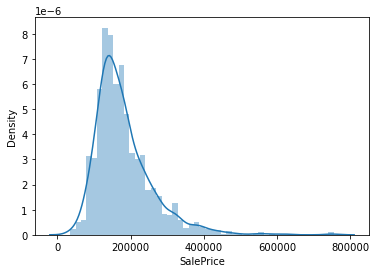

In [44]:
sns.distplot(y)
print(y.skew())

The dependent variable, SalePrice, has a high degree of skweness. It could be log transformed to make its distribution 'normal'

I then chek if there is any missing value in the dependent variable.

In [45]:
y.isnull().any()

False

Log transforming the dependent variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

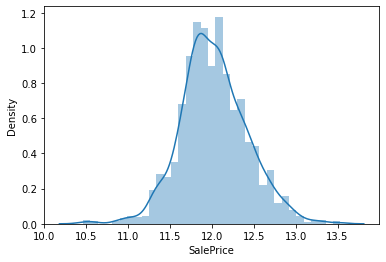

In [46]:
import numpy as np


y_bc = np.log(y)
sns.distplot(np.log(y))

Splitting the Data for Training

In [47]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=100)

In [48]:
X_train.shape

(1168, 83)

In [49]:
X_test.shape

(292, 83)

In [50]:
# from sklearn.preprocessing import StandardScaler

In [51]:
# stdScaler = StandardScaler()

# for feature in numerical_variables.columns:
#     if feature not in ["Id","SalesPrice"]:
#         X_train[feature] = stdScaler.fit_transform(X_train[feature])
#         X_train_std = pd.DataFrame(data=stdScaler.transform(X_train[feature]), columns=X_train[feature].columns)
#         X_test_std = pd.DataFrame(data=stdScaler.transform(X_test[feature]), columns=X_test[feature].columns)

Training the Model

In [52]:
# importing the required library

from sklearn.linear_model import LinearRegression

Creating the model instance, then fitting the model

In [53]:
# creating a linear regression instance
linear_reg = LinearRegression()

# fitting the linear model
model = linear_reg.fit(X_train, y_train)

I then use the trained model to predict the test data

In [54]:
# predict 'SalePrice' from test data
y_pred = model.predict(X_test)


# Section 5.1: Model Evaluation

I then evaluate the model using the RMSE and R-Squared values

In [55]:
from sklearn.metrics import mean_squared_error


# get the Root mean squared error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(RMSE)

29733.824563221537


*Ascetaining The Model for Business Predictions *

In [56]:
# compute the R-Squared value of the model

from sklearn.metrics import r2_score

In [57]:
RSQ = r2_score(y_test, y_pred)

print(RSQ)

0.8624843796722466


# Conclusion and Further steps

* I was able to pick 11 features that considerably affect housing prices using descriptive measures
* Build a model that can predict housing prices
* I ascetained that the model is fit for purpose as a tool to be used by either realtors, house buyers or prospective house buyers.
Based on the RSQ measure above, we can conclude that the model has a decent prediction accuracy, 86%, and can be used to determine the price of a house before purchasing, or if it is the case of a seller, they could use it to determine the appropriate price of a house.

The model accuracy could be improved by:

1. Transforming some of the variables, especially the numerical ones
2. Standardizing the numerical variables
3. Introducing some polynmials for some of the features